In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# functions
def lorenz(state, t):
    sigma = 10
    rho = 28
    beta = 3
    x, y, z = state
    return np.array([sigma*(y-x), x*(rho-z)-y, x*y-beta*z])


def lorenz_trajectory(s0, N):
    sigma = 10
    rho = 28
    beta = 8/3.

    delta = 0.001
    s = np.empty((N+1, 3))
    s[0] = s0
    for i in np.arange(1, N+1):
        x, y, z = s[i-1]
        a = np.array([sigma*(y-x), x*(rho-z)-y, x*y-beta*z])
        s[i] = s[i-1] + a * delta
    return s

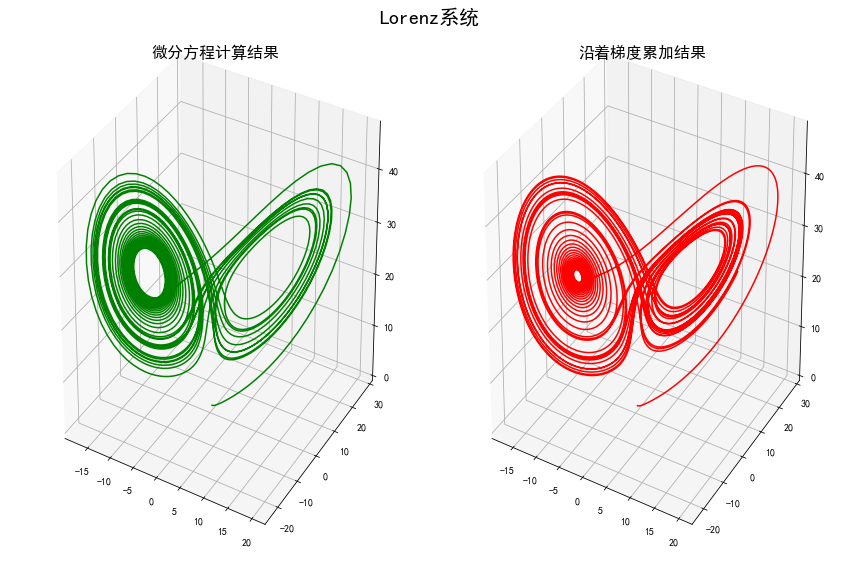

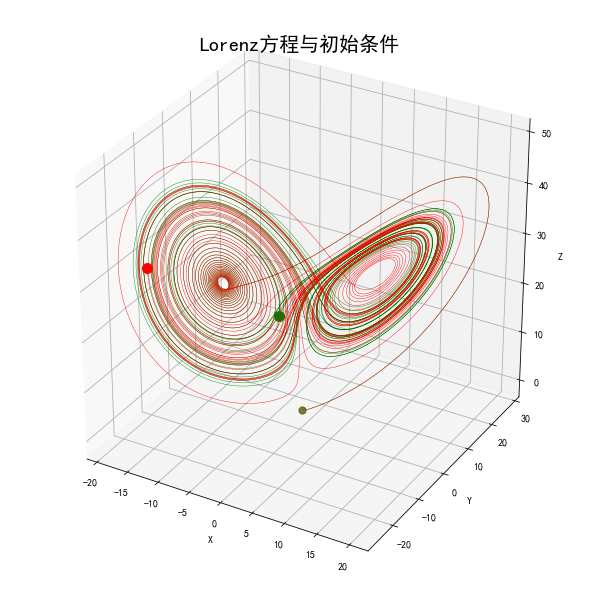

In [3]:
# start main function
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# Figure 1
s0 = (0., 1., 0.)
t = np.arange(0, 30, 0.01)
s = odeint(lorenz, s0, t)
plt.figure(figsize=(12, 8), facecolor='w')
plt.subplot(121, projection='3d')
plt.plot(s[:, 0], s[:, 1], s[:, 2], c='g')
plt.title('微分方程计算结果', fontsize=16)

s = lorenz_trajectory(s0, 40000)
plt.subplot(122, projection='3d')
plt.plot(s[:, 0], s[:, 1], s[:, 2], c='r')
plt.title('沿着梯度累加结果', fontsize=16)

plt.tight_layout(1, rect=(0,0,1,0.98))
plt.suptitle('Lorenz系统', fontsize=20)
plt.show()

# Figure 2
ax = Axes3D(plt.figure(figsize=(8, 8)))
s0 = (0., 1., 0.)
s1 = lorenz_trajectory(s0, 50000)
s0 = (0., 1.0001, 0.)
s2 = lorenz_trajectory(s0, 50000)
# 曲线
ax.plot(s1[:, 0], s1[:, 1], s1[:, 2], c='g', lw=0.4)
ax.plot(s2[:, 0], s2[:, 1], s2[:, 2], c='r', lw=0.4)
# 起点
ax.scatter(s1[0, 0], s1[0, 1], s1[0, 2], c='g', s=50, alpha=0.5)
ax.scatter(s2[0, 0], s2[0, 1], s2[0, 2], c='r', s=50, alpha=0.5)
# 终点
ax.scatter(s1[-1, 0], s1[-1, 1], s1[-1, 2], c='g', s=100)
ax.scatter(s2[-1, 0], s2[-1, 1], s2[-1, 2], c='r', s=100)
ax.set_title('Lorenz方程与初始条件', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()